In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

The image generator class from tensorflow plays an important role in Image Detection and it is available in:

keras.preprocesssing.image

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Instantiate an imagedatagenerator class

In [ ]:
train_data_gen=ImageDataGenerator(rescale=1./255)

rescale parameter is used to normalize the data

Run the code below to download the compressed dataset horse-or-human.zip.

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-06-06 22:03:22--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   132MB/s    in 1.1s    

2024-06-06 22:03:23 (132 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



You can then unzip the archive using the zipfile module.

In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory ./horse-or-human, which in turn each contain horses and humans subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like' and 'this is what a human looks like'.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. You will use the ImageDataGenerator API instead -- and this is coded to automatically label images according to the directory names and structure. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageDataGenerator will label the images appropriately for you, reducing a coding step.

You can now define each of these directories:

In [ ]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Now see what the filenames look like in the horses and humans training directories:

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse36-2.png', 'horse36-4.png', 'horse14-0.png', 'horse01-2.png', 'horse08-7.png', 'horse04-8.png', 'horse10-3.png', 'horse38-2.png', 'horse32-8.png', 'horse21-2.png']
['human15-02.png', 'human16-20.png', 'human07-17.png', 'human01-14.png', 'human02-11.png', 'human16-29.png', 'human07-21.png', 'human12-00.png', 'human09-27.png', 'human08-15.png']


You can also find out the total number of horse and human images in the directories:

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now take a look at a few pictures to get a better sense of what they look like. First, configure the matplotlib parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

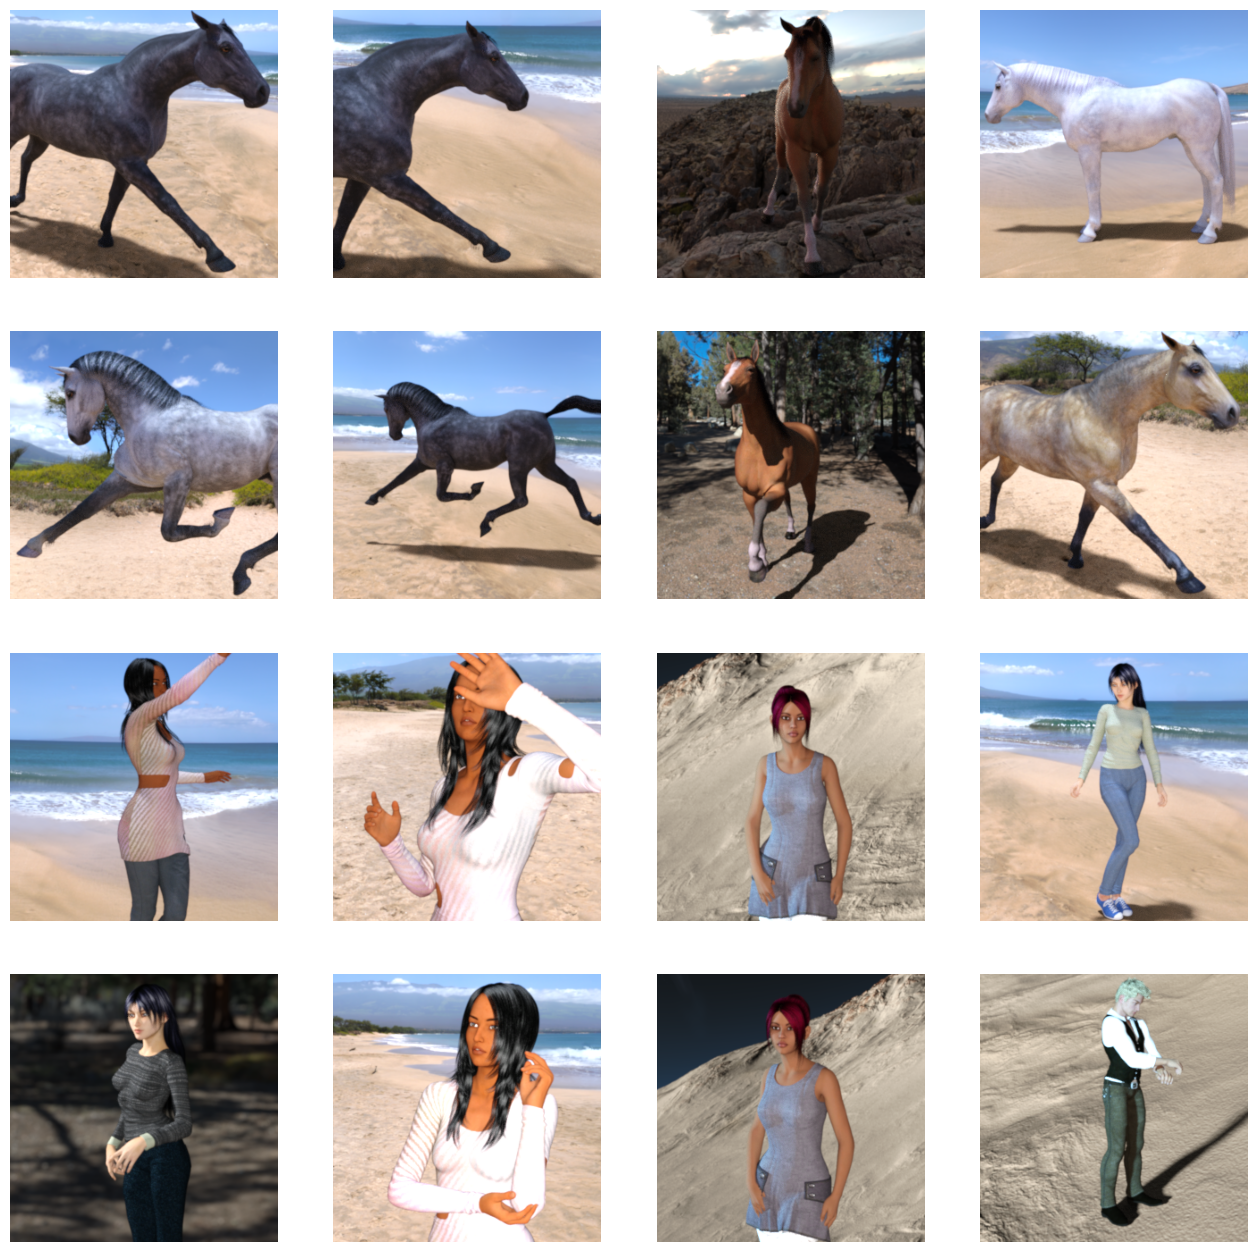

In [ ]:
#Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building a Small Model from Scratch**

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

Next, you'll configure the specifications for model training. You will train the model with the binary_crossentropy loss because it's a binary classification problem, and the final activation is a sigmoid. (For a refresher on loss metrics, see this Machine Learning Crash Course.) You will use the rmsprop optimizer with a learning rate of 0.001. During training, you will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

in the below code we are adjusting the weights for optimization by using the learning_rate parameter

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

**Data Preprocessing**

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

we are converting the data to normalized data for calculations.

In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

**Load images from a directory**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


**Training**

You can start training for 15 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The loss and accuracy are great indicators of progress in training. loss measures the current model prediction against the known labels, calculating the result. accuracy, on the other hand, is the portion of correct guesses.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 110s 13s/step - loss: 0.7394 - accuracy: 0.5395
Epoch 2/15
8/8 [==============================] - 100s 12s/step - loss: 0.7033 - accuracy: 0.5584
Epoch 3/15
8/8 [==============================] - 99s 12s/step - loss: 0.6846 - accuracy: 0.6385
Epoch 4/15
8/8 [==============================] - 100s 12s/step - loss: 0.6776 - accuracy: 0.6440
Epoch 5/15
8/8 [==============================] - 98s 12s/step - loss: 0.5093 - accuracy: 0.8120
Epoch 6/15
8/8 [==============================] - 113s 14s/step - loss: 0.3928 - accuracy: 0.8291
Epoch 7/15
8/8 [==============================] - 104s 12s/step - loss: 0.3517 - accuracy: 0.8854
Epoch 8/15
8/8 [==============================] - 98s 12s/step - loss: 0.3815 - accuracy: 0.8554
Epoch 9/15
8/8 [==============================] - 98s 12s/step - loss: 0.1721 - accuracy: 0.9288
Epoch 10/15
8/8 [==============================] - 98s 12s/step - loss: 0.1162 - accuracy: 0.9511
Epoch 11/15
8/8 [=======

**Model Prediction**

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))#converting the image to (300,300) size which is normal size for this problem
  x = img_to_array(img) #Converting the image to array [tensor]
  x /= 255 #Normalizing the image
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving Screenshot 2024-03-22 at 1.47.44 PM.png to Screenshot 2024-03-22 at 1.47.44 PM.png
1/1 [==============================] - 0s 193ms/step
[0.9999871]
Screenshot 2024-03-22 at 1.47.44 PM.png is a human


The code you provided seems to be performing image classification to distinguish between humans and horses. Here's a breakdown of the code:

1. Define Path and Load Image:

path = '/content/' + fn: This line constructs the complete path to the image file. It assumes the image is stored in a directory named content within your working environment.
img = load_img(path, target_size=(300, 300)): This line loads the image from the specified path using the load_img function (likely from a library like Keras). It also resizes the image to a size of (300, 300) pixels, which is a common pre-processing step for image classification tasks.
2. Preprocess Image:

x = img_to_array(img): This line converts the loaded image from its original format (likely PIL format) into a NumPy array. This is a more suitable format for working with images in machine learning tasks.
x /= 255: This line normalizes the pixel values of the image. Each pixel value (originally between 0 and 255) is divided by 255, resulting in values between 0 and 1. Normalization helps improve the training process of the machine learning model.
x = np.expand_dims(x, axis=0): This line adds an extra dimension to the image array. The resulting array has a shape of (1, 300, 300, 3) where the first dimension represents a single image in the batch. This is because the model.predict function typically expects a batch of images as input.
3. Prediction and Classification:

images = np.vstack([x]): This line creates a batch of images by stacking the preprocessed image (x) into a new array.
classes = model.predict(images, batch_size=10): This line uses the trained model (model) to predict the class probabilities for the image batch (images). The batch_size argument is set to 10, although it only has one image in this case.
print(classes[0]): This line prints the predicted class probabilities. Since you only have two classes (human and horse), the output will likely be a vector with two values representing the probability of the image belonging to each class.
4. Decision Making:

The code checks if the first element of the classes array (corresponding to the probability of being a human) is greater than 0.5.
If the probability is greater than 0.5, the code prints that the filename (fn) is a human.
Otherwise, it prints that the filename (fn) is a horse.

When dealing with datasets of Images in zip format.

Step 1:
=====
	1)create a zip folder locally.

	2)Reference to the folder where the folder is present

	3)extract the files in folder by using the reference folder

	4)close the zip folder


Interms of python code:


import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./horse-or-human')

zip_ref.close()


Step 2:
=====

How to categorize the data

	1)from the base folder create a sub folder.

Interms of code:

import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')



#All the above we can do by using ImageDatagenerator class of  eras.


This code for imageDatagenerator:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',
          # This is the source directory for training images
        target_size=(300, 300),  
        # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

